In [1]:
## BOX PLOT 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\AppData\Local\Temp\ipykernel_24548\2167650326.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
np.random.seed(42)
normal_data = np.random.normal(50,10,200)
outliers_max = np.random.uniform(100, 120, 20)
outliers_min = np.random.uniform(10,5,20)
all_data = np.concatenate([normal_data , outliers_max, outliers_min])
df = pd.DataFrame({'values': all_data})

In [11]:
df.head(10)

,values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
5,47.658630
6,65.792128
7,57.674347
8,45.305256
9,55.425600


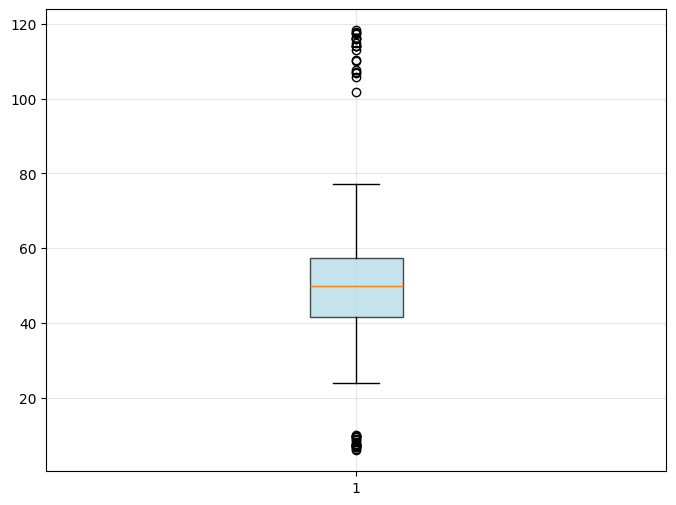

In [12]:
plt.figure(figsize  =(8,6))
plt.boxplot(df['values'], patch_artist = True,boxprops = dict(facecolor = 'lightblue', alpha = 0.7))
plt.grid(True, alpha = 0.3)
plt.show()

In [30]:
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_formula = (df['values']<= lower_bound) & (df['values'] >= upper_bound)
num_outliers = outliers_formula.sum()
num_outliers

0

In [31]:
df_clean = df[~outliers_formula]
df_clean

,values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
235,9.573263
236,9.741591
237,7.343227
238,7.296824


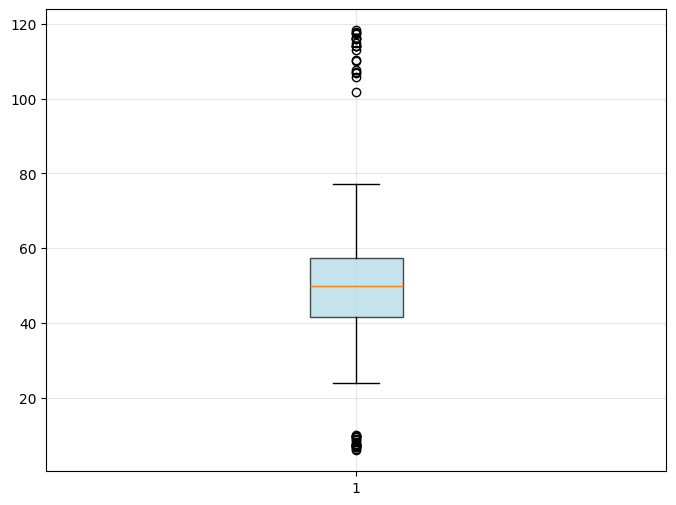

In [32]:
plt.figure(figsize  =(8,6))
plt.boxplot(df_clean['values'], patch_artist = True,boxprops = dict(facecolor = 'lightblue', alpha = 0.7))
plt.grid(True, alpha = 0.3)
plt.show()

In [37]:
Q1 = df_clean['values'].quantile(0.25)
Q3 = df_clean['values'].quantile(0.75)
IQR = Q3 - Q1

# Keep only the values within the acceptable range
df_no_outliers = df_clean[(df_clean['values'] >= Q1 - 1.5 * IQR) & 
                          (df_clean['values'] <= Q3 + 1.5 * IQR)]


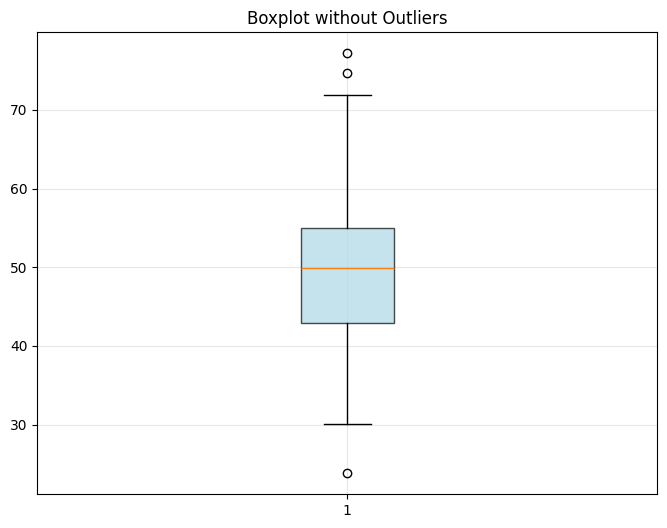

In [38]:


df_no_outliers = df_clean[(df_clean['values'] >= Q1 - 1.5 * IQR) & 
                          (df_clean['values'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(8,6))
plt.boxplot(df_no_outliers['values'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.grid(True, alpha=0.3)
plt.title("Boxplot without Outliers")
plt.show()


In [60]:
df= pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [40]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df_titanic.shape

(891, 12)

In [43]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
df_titanic['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [51]:
df_titanic = df

In [59]:
df_titanic.columns

Index(['values'], dtype='object')

In [57]:
df_titanic['Sex']

KeyError: 'Sex'

In [64]:
filtered_df = df[(df['Sex']== 'male') & (df['Survived']==1) & (df['Pclass']==2)]
filtered_df.shape

(17, 12)

In [65]:
average_age = df['Age'].mean()
average_age

29.69911764705882

In [66]:
mode_age = df['Age'].mode()
mode_age

0    24.0
Name: Age, dtype: float64

In [67]:
median_age = df['Age'].median()
median_age

28.0

In [68]:
df['Age'].fillna(average_age, inplace = True)
df.isnull().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_24548\928596357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(average_age, inplace = True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df = df.drop('Cabin', axis = 1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [70]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [74]:
mode = df['Embarked'].mode()
mode

0    S
Name: Embarked, dtype: object

In [76]:
df['Embarked'].fillna('S', inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
survival_counts = df['Survived'].value_counts()

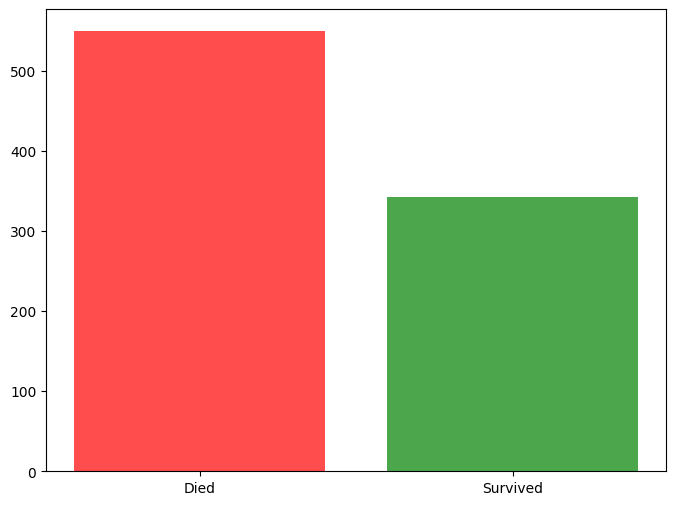

In [79]:
## BAR CHART HOW MANY SURVIVED AND NOT SURVIVED
plt.figure(figsize=(8,6))
bars = plt.bar(['Died', 'Survived'],
              [survival_counts[0], survival_counts[1]],
              color = ['red', 'green'], alpha = 0.7)
plt.show()

In [84]:
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_sex.columns = ['Died', 'Survived']

<Figure size 800x600 with 0 Axes>

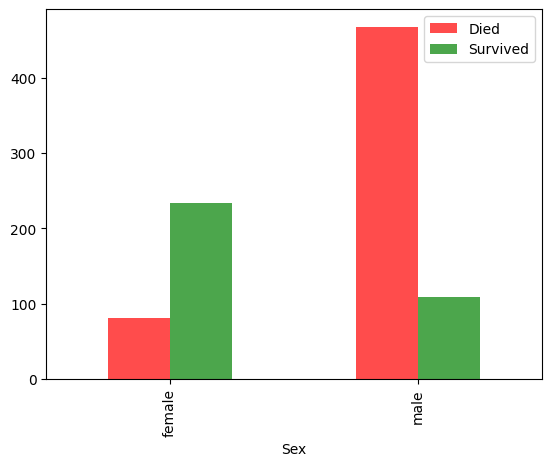

In [85]:
plt.figure(figsize=(8,6))
survival_by_sex.plot(kind = 'bar', color = ['red', 'green'],
                     alpha = 0.7)
plt.show()

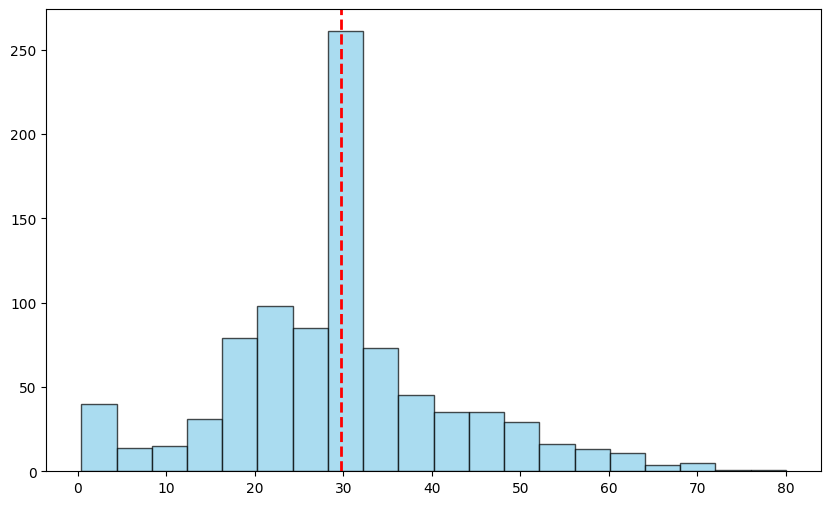

In [87]:
plt.figure(figsize = (10,6))
plt.hist(df[
         'Age'], bins = 20, color = 'skyblue', alpha = 0.7, edgecolor = 'black'
)
plt.axvline(average_age, color = 'red', linestyle = '--', linewidth = 2, 
           label = f'Average age: {average_age:.1f}')
plt.show()

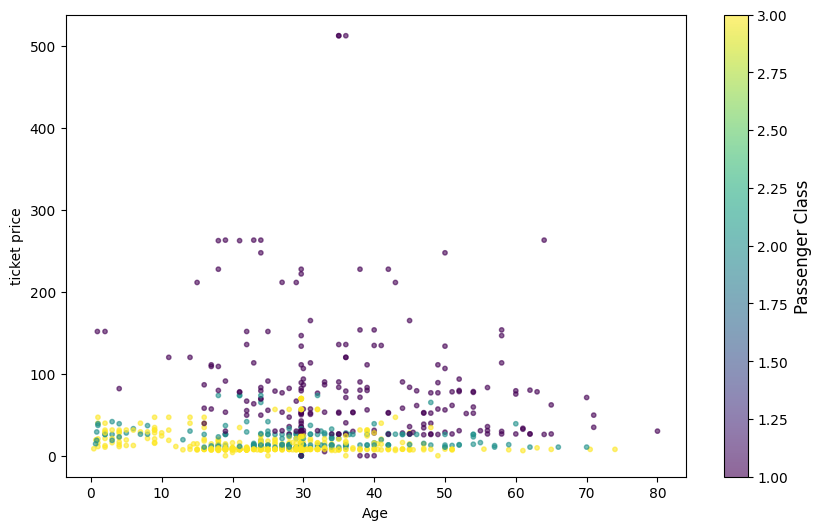

In [89]:
## SCATTER PLOT 

plt.figure(figsize = (10,6))
plt.scatter(df['Age'], df['Fare'], 
           c = df['Pclass'],
           alpha =0.6, s = 10)
plt.xlabel('Age')
plt.ylabel("ticket price")
colorbar = plt.colorbar()
colorbar.set_label('Passenger Class', fontsize= 12)

plt.show()

In [91]:
correlation_matrix = df.corr(numeric_only = True)
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


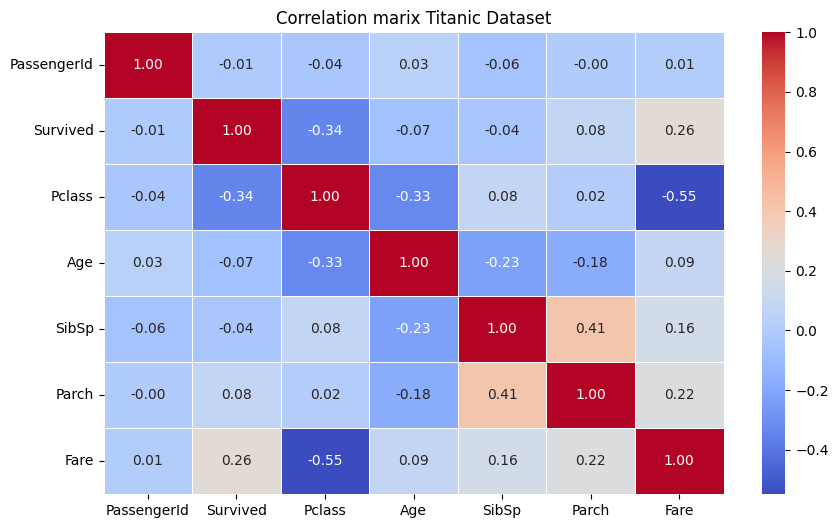

In [92]:
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths=0.5 )
plt.title("Correlation marix Titanic Dataset")
plt.show()

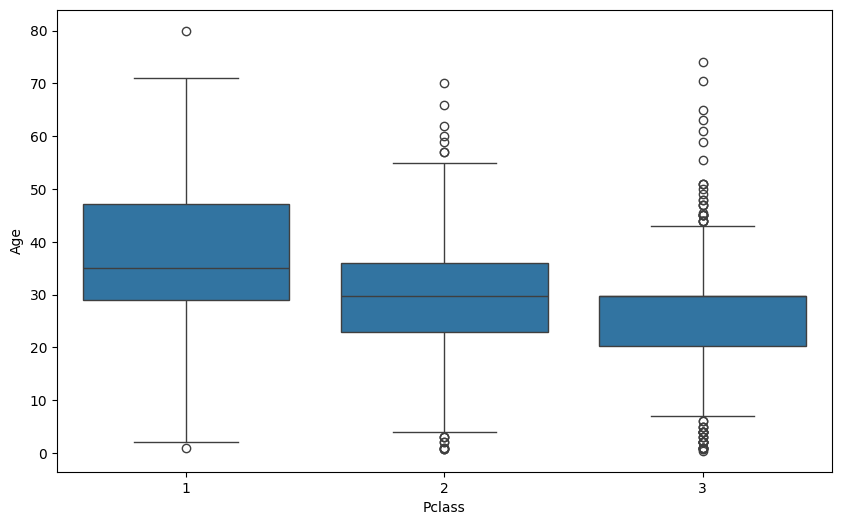

In [93]:
## BOX PLOT 
plt.figure(figsize = (10,6))
sns.boxplot(data = df, 
           x = 'Pclass', 
           y = 'Age')
plt.show()

In [117]:
Q1 = df_no_outliers['Age'].quantile(0.25)
Q3 = df_no_outliers['Age'].quantile(0.75)
IQR = Q3 - Q1

In [118]:

lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR 

In [119]:
df_clean = df_no_outliers
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [120]:

# Find outliers
outliers = df_clean[(df_clean['Age'] < lower_bound) | (df_clean['Age'] > upper_bound)]
print(f"Found {len(outliers)} outliers")

# Remove outliers
df_no_outliers = df_clean[(df_clean['Age'] >= lower_bound) & (df_clean['Age'] <= upper_bound)]
print(f"After removing outliers: {len(df_no_outliers)} passengers left")

Found 0 outliers
After removing outliers: 728 passengers left


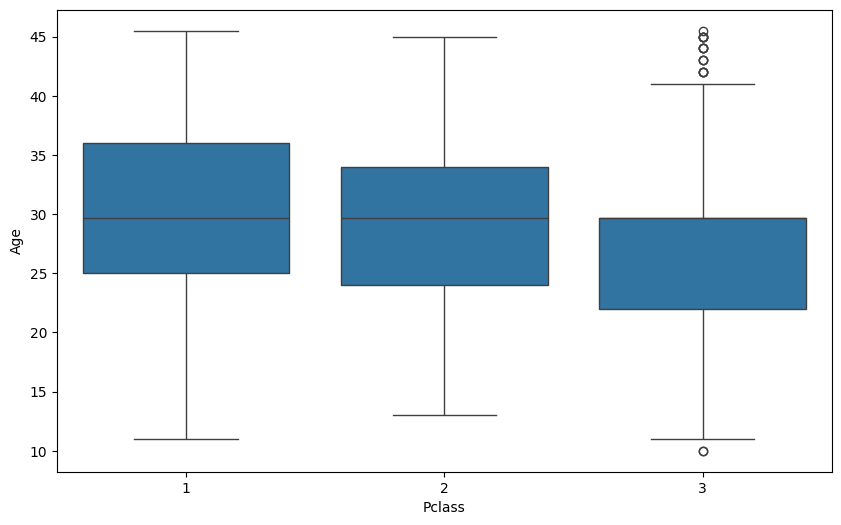

In [121]:
## BOX PLOT 
plt.figure(figsize = (10,6))
sns.boxplot(data = df_no_outliers, 
           x = 'Pclass', 
           y = 'Age')
plt.show()